<a href="https://colab.research.google.com/github/mfvalle/Maths_for_MachineLearning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

We will build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


In [ ]:
!git clone https://github.com/mfvalle/Maths_for_MachineLearning.git

Cloning into 'Maths_for_MachineLearning'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 105 (delta 16), reused 0 (delta 0), pack-reused 67
Receiving objects: 100% (105/105), 1.61 MiB | 5.51 MiB/s, done.
Resolving deltas: 100% (43/43), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

passengers = pd.read_csv("/content/Maths_for_MachineLearning/train.csv")

# Update sex column to numerical
passengers['Sex'] = passengers['Sex'].map({'female': 1, 'male': 0})

# Fill the NaN values in the age column
age_mean = passengers['Age'].mean()
passengers['Age'].fillna(value=age_mean, inplace=True)

# Utilize the Pclass column as additional features
passengers['FirstClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 1 else 0)
passengers['SecondClass'] = passengers['Pclass'].apply(lambda x: 1 if x == 2 else 0)

# Verify the changes made
passengers.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstClass,SecondClass
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,0,0


In [ ]:

# Select the desired features
features = passengers[['Sex', 'Age', 'FirstClass', 'SecondClass']]
survival = passengers['Survived']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(features, survival, test_size=0.2)

# Scale the feature data so it has mean = 0 and standard deviation = 1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Score the model on the train data
print("The training score is:", model.score(X_train_scaled, y_train))
print("The test score is: ", model.score(X_test_scaled, y_test))

# Sample passenger features to make some predictions with the model
Jack = pd.DataFrame([[0.0, 20.0, 0.0, 0.0]], columns=['Sex', 'Age', 'FirstClass', 'SecondClass'])
Rose = pd.DataFrame([[1.0, 17.0, 1.0, 0.0]], columns=['Sex', 'Age', 'FirstClass', 'SecondClass'])
Me = pd.DataFrame([[0.0, 22.0, 0.0, 1.0]], columns=['Sex', 'Age', 'FirstClass', 'SecondClass'])

# Scale the sample passenger features
sample_passengers = pd.concat([Jack, Rose, Me], ignore_index=True)
sample_passengers_scaled = scaler.transform(sample_passengers)

# Make survival predictions
print("Survival classifications:", model.predict(sample_passengers_scaled))
print("Survival probabilities:", model.predict_proba(sample_passengers_scaled))


The training score is: 0.7823033707865169
The test score is:  0.770949720670391
Survival classifications: [0 1 0]
Survival probabilities: [[0.87171795 0.12828205]
 [0.04824288 0.95175712]
 [0.73781678 0.26218322]]


# [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

We will be using this Data Set (Diagnostic) to predict whether a tumor is benign (0) or malignant (1) based on characteristics of the cells, such as radius, texture, smoothness, etc

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import zscore 

''' 
Primary assumptions about the data that need to be checked before implementing a logistic regression model:

1. The target variable is binary
2. Independent observations
3. Large enough sample size
4. No influential outliers
'''


df = pd.read_csv('/content/Maths_for_MachineLearning/data.csv')
#encode malignant as 1, benign as 0
df['diagnosis'] = df['diagnosis'].replace({'M':1,'B':0})

#print(df.head())

#imports/load data
predictor_var = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
df.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


0    357
1    212
Name: diagnosis, dtype: int64
number of unique IDs is equal to sample size: True
21.2


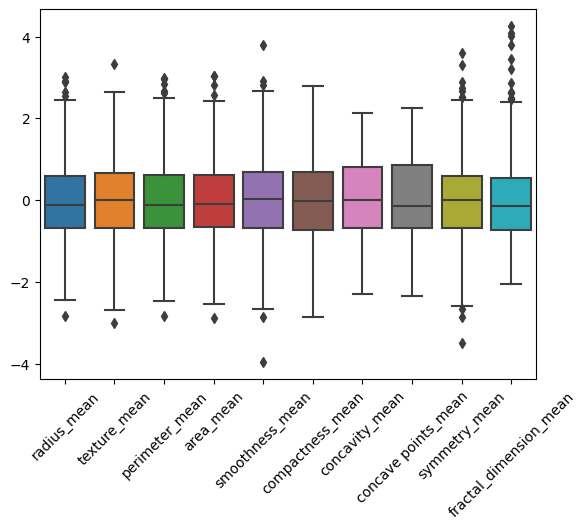

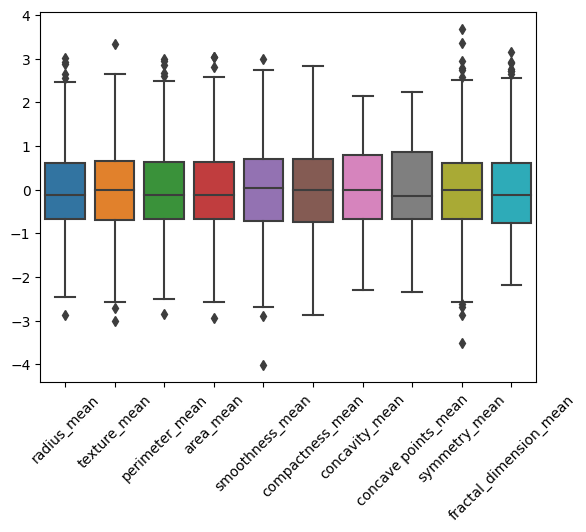

In [ ]:

#1. Print distinct diagnosis values and frequency in dataset
print(df['diagnosis'].value_counts())

#2. Test if the number of unique IDs is equal to sample size, i.e. no repeated patients

print("number of unique IDs is equal to sample size:", df['id'].nunique() == df['id'].count())

#3. At a maximum, there should be no more than the smallest class size divided by 10 number of features.

max_features = min(df.diagnosis.value_counts()/10)
print(max_features)

#4.  features have extreme outliers:
sns.boxplot(data=np.log(df[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()

#5. Remove the samples with extreme fractal_dimensions_mean values:
q_hi  = df["fractal_dimension_mean"].quantile(0.99)
df_filtered = df[(df["fractal_dimension_mean"] < q_hi)]

#6. Run the boxplot again but with the filtered dataframe:

sns.boxplot(data=np.log(df_filtered[predictor_var]+.01).apply(zscore))
plt.xticks(rotation=45);
plt.show()
plt.close()



```
1. The target variable is binary
One of the most basic assumptions of logistic regression is that the outcome variable needs to be binary, which means there are two possible outcomes. Multinomial logistic regression is an exception to this assumption and is beyond the scope of this lesson.

2. Independent observations
While often overlooked, checking for independent observations in a data set is important for logistic regression. This can be violated if, in this case, patients are biopsied multiple times (repeated sampling of the same individual).

3. Large enough sample size
Since logistic regression is fit using maximum likelihood estimation instead of least squares minimization, there must be a large enough sample to get convergence. When a model fails to converge, this causes the estimates to be extremely inaccurate. Now, what does a “large enough” sample mean? Often a rule of thumb is that there should be at least 10 samples per feature for the smallest class in the outcome variable.

For example, if there were 100 samples and the outcome variable diagnosis had 60 benign tumors and 40 malignant tumors, then the max number of features allowed would be 4. To get 4 we took the smallest of the classes in the outcome variable, 40, and divided it by 10.

4. No influential outliers
Logistic regression is sensitive to outliers, so we must remove any extremely influential outliers for model building. Outliers are a broad topic with many different definitions – z-scores, scaler of the interquartile range, Cook’s distance/influence/leverage, etc – so there are many ways to identify them. But here, we will use visual tools to rule out obvious outliers.
```

